In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import os
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.set_option('max_columns', 150)

# matplotlib and seaborn for plotting

matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size


sns.set_style('darkgrid')

color = sns.color_palette()

rootdata = '/content/drive/MyDrive/Thesis Data/original_data/'

# Data Loading

In [8]:
aisles = pd.read_csv(rootdata+'aisles.csv')
departments = pd.read_csv(rootdata+'departments.csv')
orders = pd.read_csv(rootdata+'orders.csv',engine='python')
order_products_prior = pd.read_csv(rootdata+'order_products__prior.csv')
order_products_train = pd.read_csv(rootdata+'order_products__train.csv')
products = pd.read_csv(rootdata+'products.csv')

In [18]:
#Method to reduce memory  consumption  for dataset
def reduce_memory(df):
   
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

# Data Visualisation 

#### Best Selling Products

,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4
5,47766,7409,Organic Avocado,24,4
6,47209,7293,Organic Hass Avocado,24,4
7,16797,6494,Strawberries,24,4
8,26209,6033,Limes,24,4
9,27966,5546,Organic Raspberries,123,4


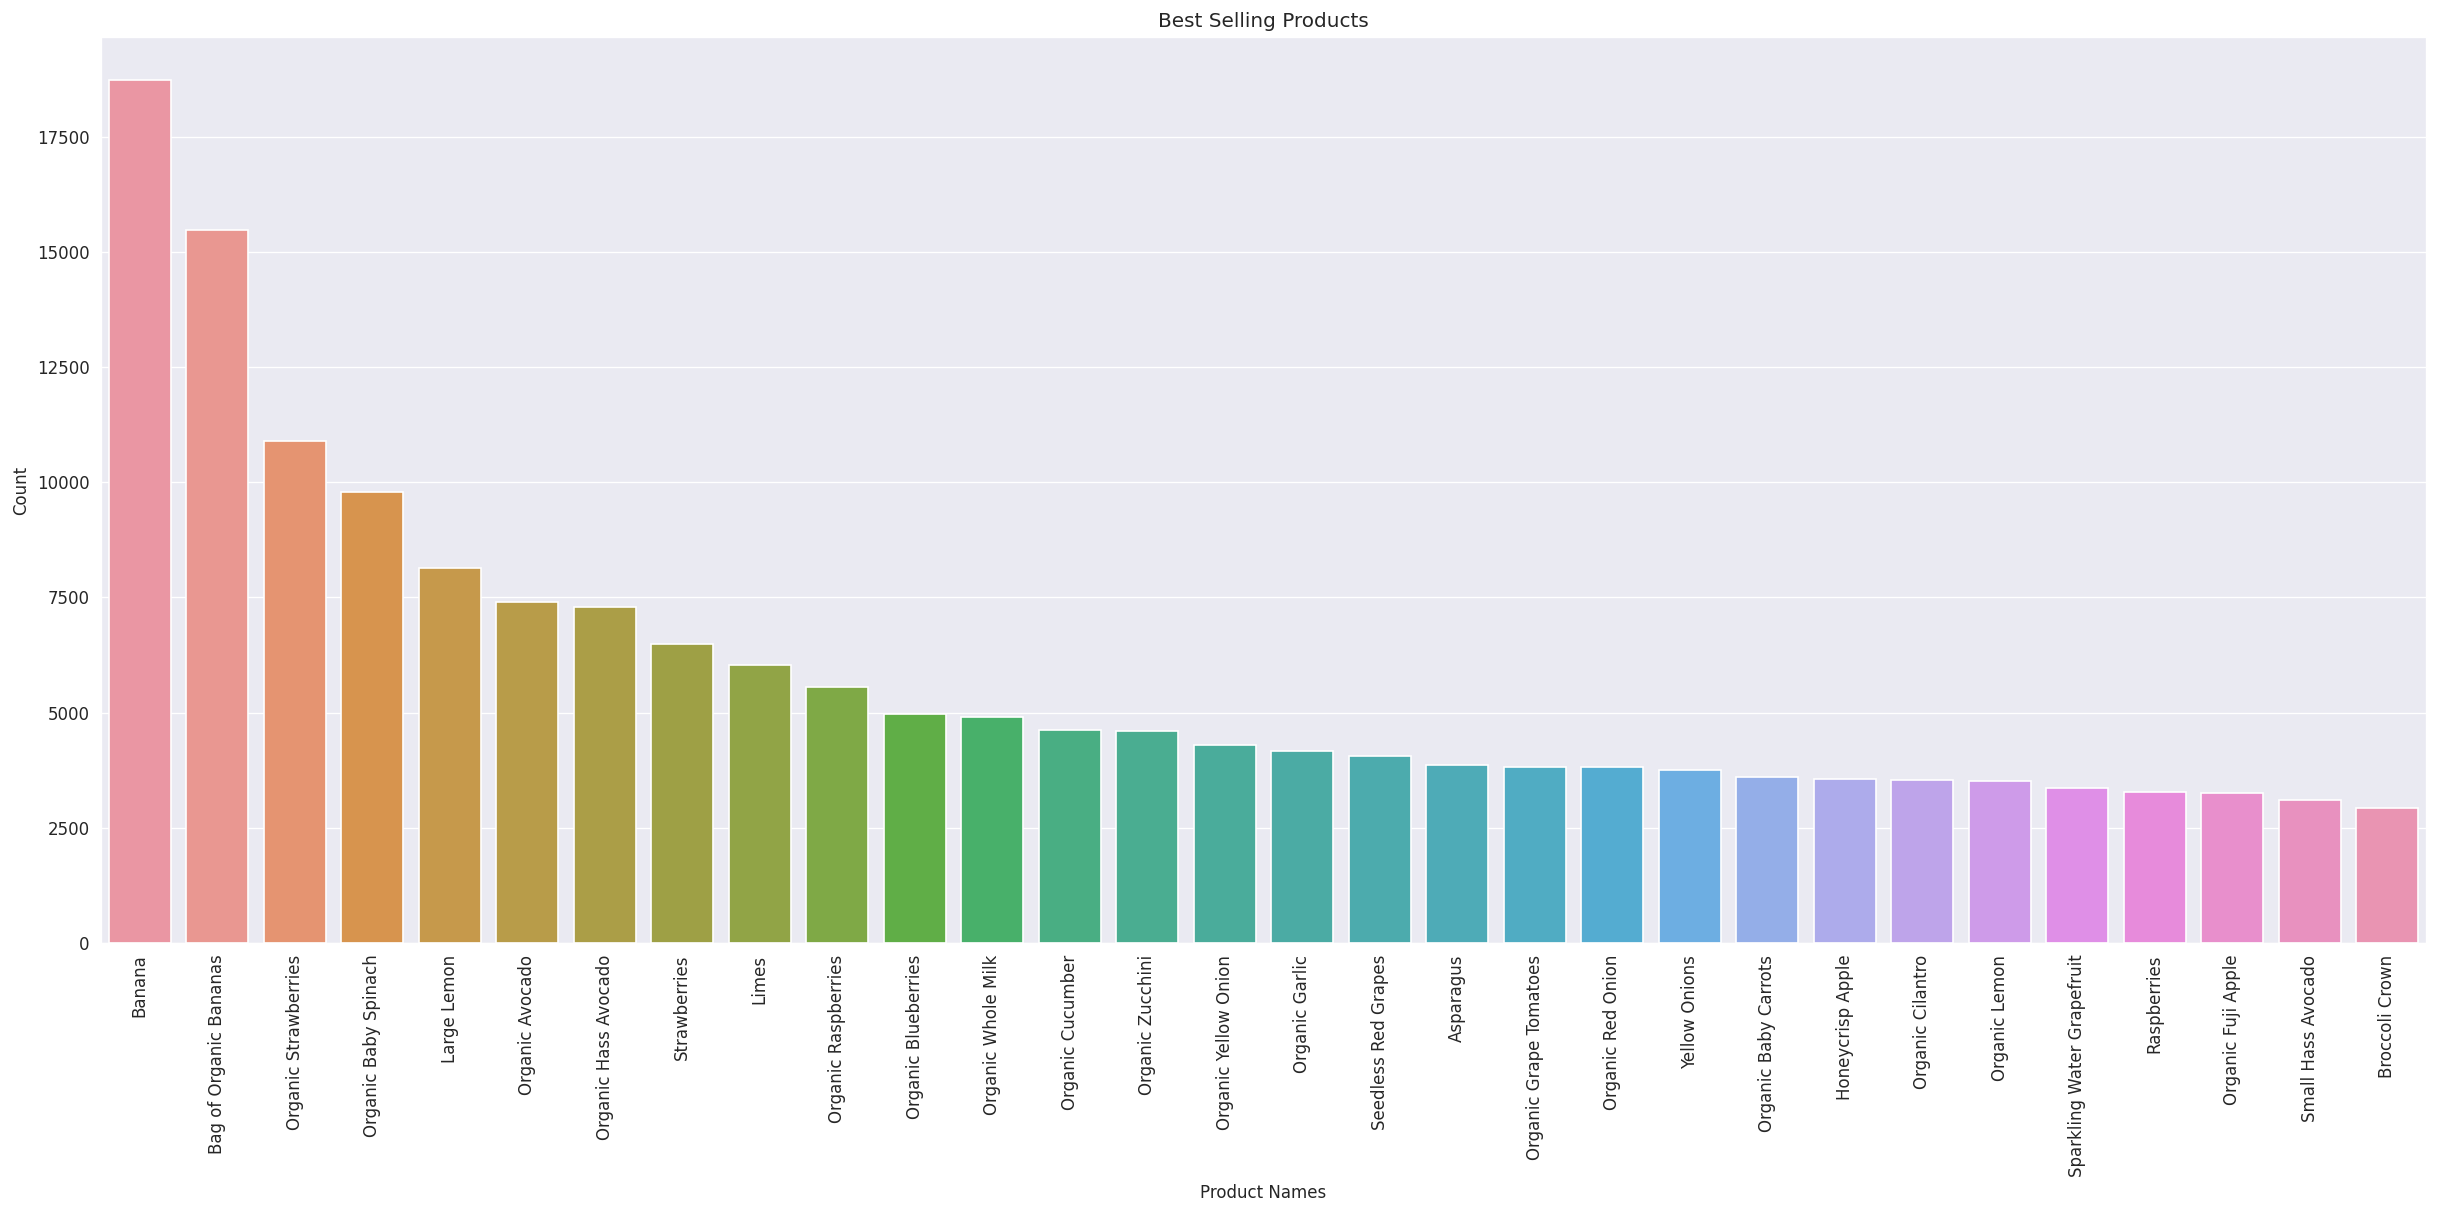

In [24]:
# Graphical representation  of Best Selling Product
productsCount = order_products_train["product_id"].value_counts().to_frame()
productsCount["count"] = productsCount.product_id
productsCount["product_id"] = productsCount.index
mergedData = pd.merge(productsCount,products,how="left",on="product_id").sort_values(by="count",ascending=False)

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.barplot(data=mergedData.head(30),x="product_name",y="count",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Best Selling Products")
plt.xticks(rotation=90)
fig.savefig('Best Selling Product.png')
mergedData.head(10)

In [52]:
#Top items that most of the user brought
product_unique_users = complete_product_department_aisles_df.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3677,Banana,76125
3472,Bag of Organic Bananas,65655
31923,Organic Strawberries,61129
28843,Organic Baby Spinach,56766
22415,Large Lemon,48614
23422,Limes,46658
42908,Strawberries,44857
30300,Organic Hass Avocado,44704
28807,Organic Avocado,43954
29011,Organic Blueberries,38720


#### Top Reordered Products

,product_id,count,reordered_count,reordered_ratio,product_name,aisle_id,department_id
0,43334,1,1.0,1.0,Classics Hot Cocoa Mix Variety Pack,90,7
1,24324,1,1.0,1.0,Vitamin B-12 1000 mcg,47,11
2,3171,2,2.0,1.0,Beef Raviolis Pasta in Meat Sauce,59,15
3,20611,2,2.0,1.0,3 Ply Wheat Straw Bath Tissue,54,17
4,47221,2,2.0,1.0,Premium Roast Decaf K Cup,26,7
5,98,2,2.0,1.0,2% Yellow American Cheese,2,16
6,28558,2,2.0,1.0,Organic Irish Breakfast Black Tea,94,7
7,27354,2,2.0,1.0,Authentic Asia Shrimp Wonton Soup With Noodles,38,1
8,9361,2,2.0,1.0,Healthy Indulgence Salmon & Chicken Cat Food,41,8
9,26851,2,2.0,1.0,Chew-Lotta Long Lasting Chewbone Dog Snacks,40,8


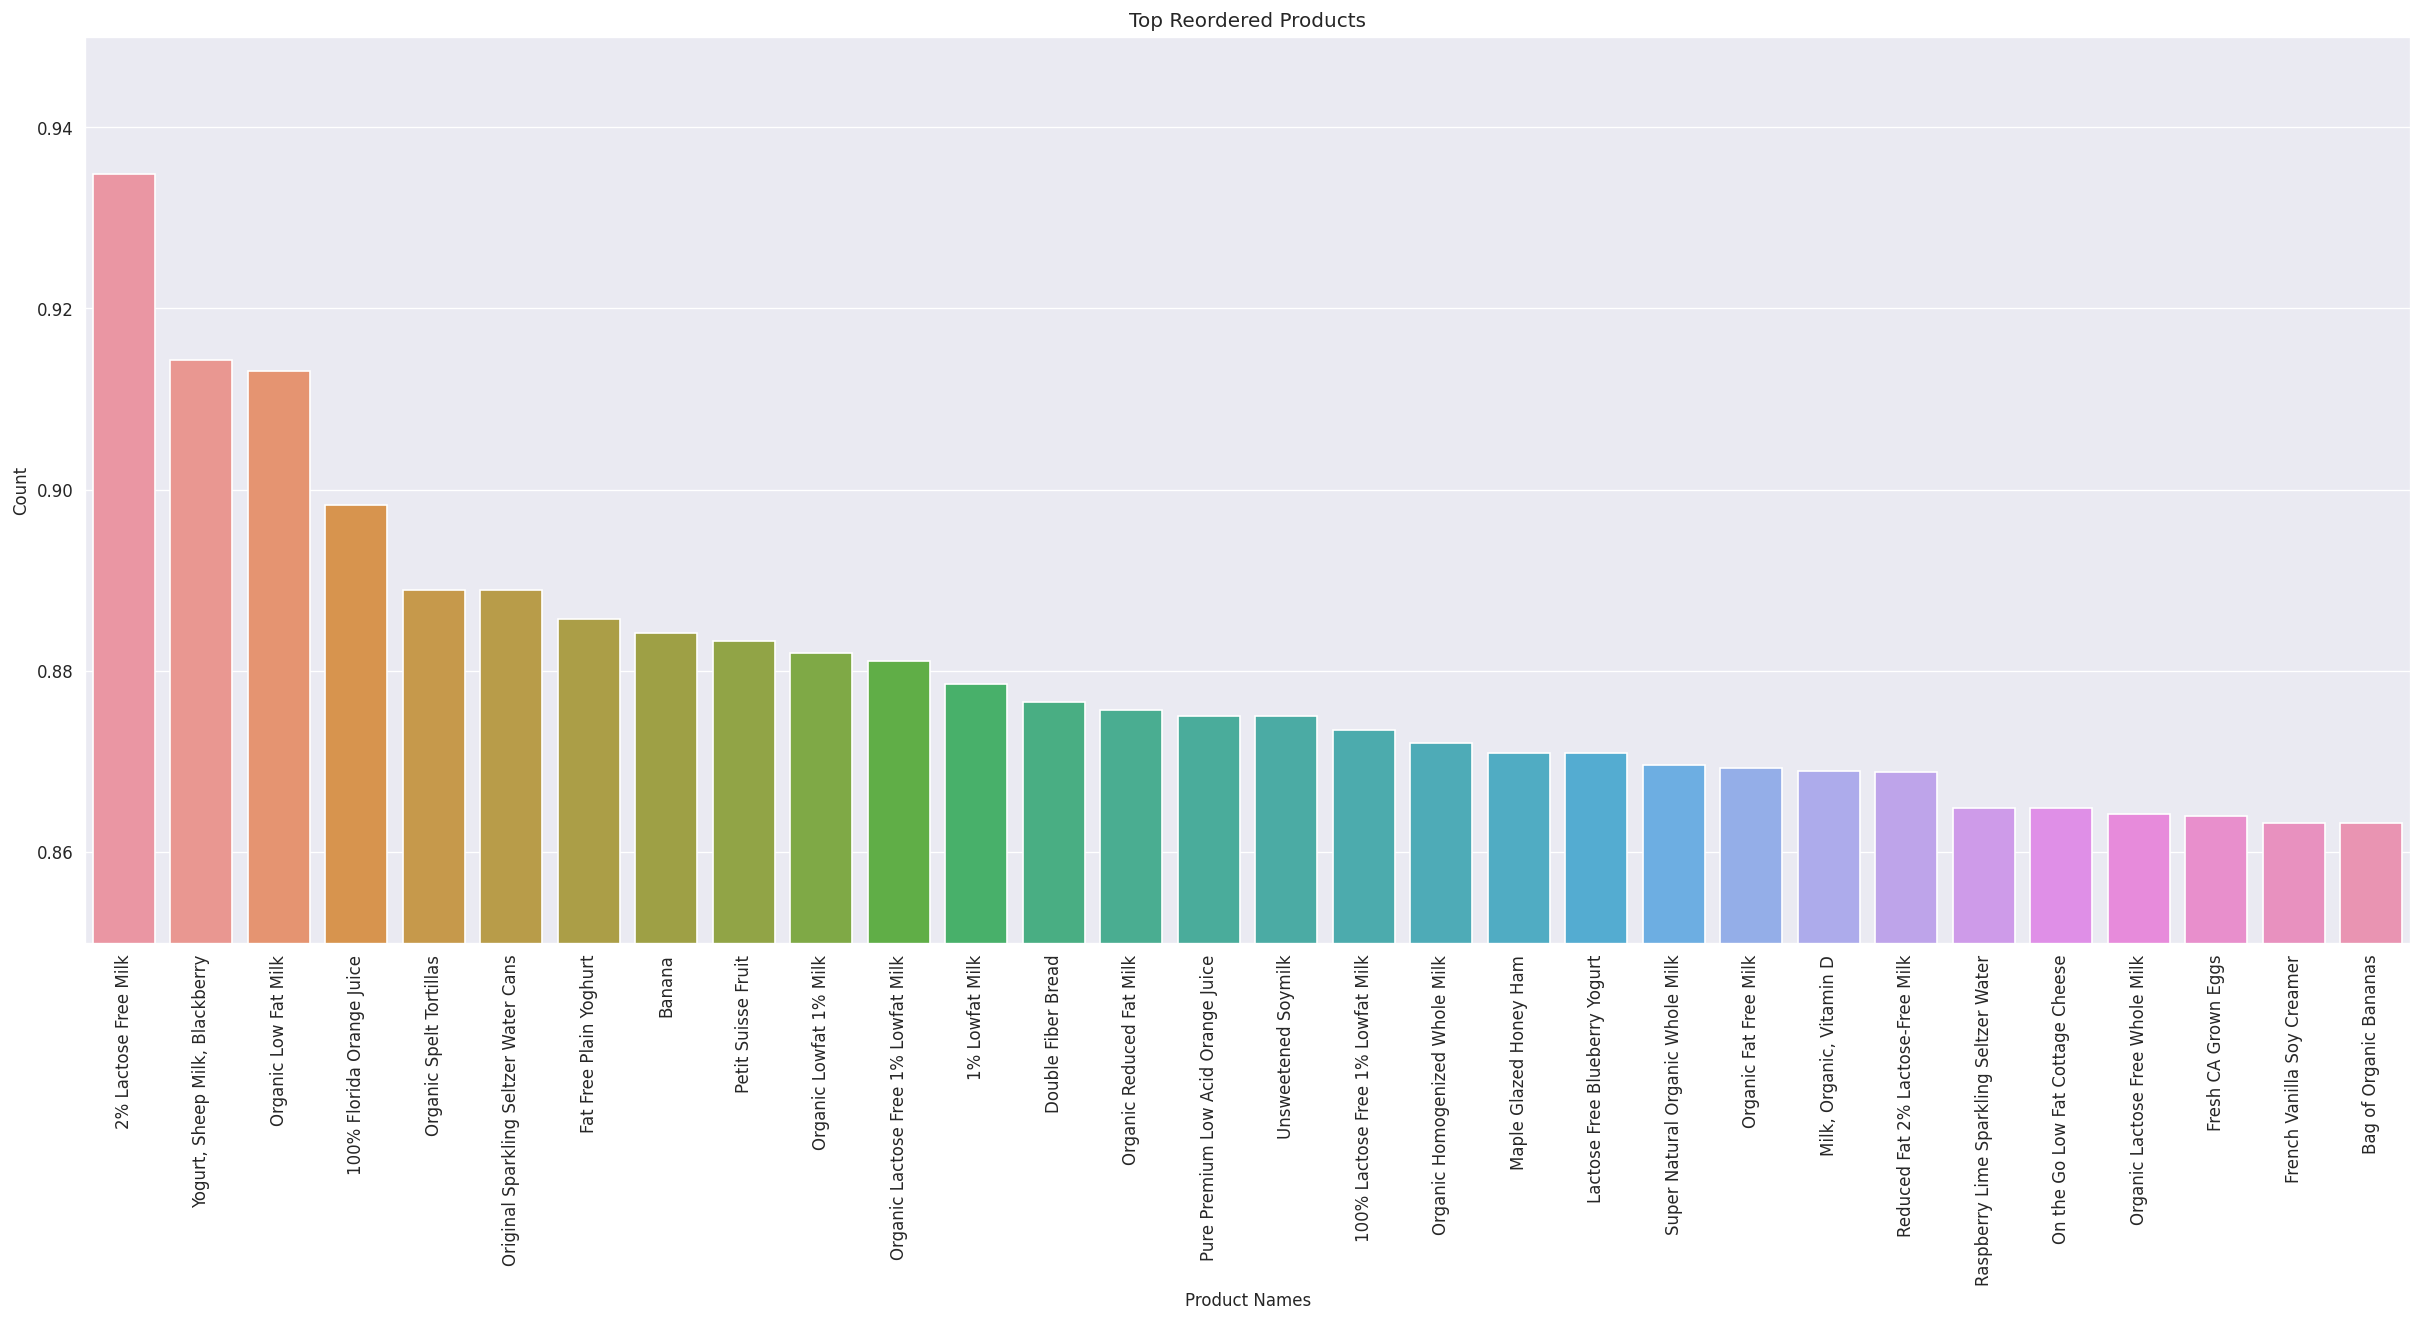

In [25]:
# Graphical representation Top Reordered Products
productsCountReordered = order_products_train[order_products_train["reordered"]==1]["product_id"].value_counts().to_frame()
productsCountReordered["reordered_count"] = productsCountReordered.product_id
productsCountReordered["product_id"] = productsCountReordered.index
productCountReorderedMerged = pd.merge(productsCount,productsCountReordered,how="left",on="product_id").sort_values(by="count",ascending=False)
productCountReorderedMerged["reordered_ratio"] = productCountReorderedMerged["reordered_count"]/productCountReorderedMerged["count"]
productCountReorderedMerged.sort_values(by="reordered_ratio",ascending=False,inplace=True)
productMerged = pd.merge(productCountReorderedMerged,products,how="left",on="product_id")

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.barplot(data=productMerged[productMerged["count"]>30].head(30),x="product_name",y="reordered_ratio",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.85,.95)
plt.xticks(rotation=90)
fig.savefig('Top Reordered Product.png')
productMerged.head(10)

#### Top Reordered Products which customer added to the cart first

,product_id,count,reordered_count,first_ordered_ratio,product_name,aisle_id,department_id
0,39239,1,1.0,1.0,Singapore Street Classic Curry Noodles,66,6
1,4611,1,1.0,1.0,Fair Trade Blackberry Premium Spread,88,13
2,34443,1,1.0,1.0,Clary Sage Essential Oil,101,17
3,10665,1,1.0,1.0,3 cup Glass Tupperware with Lid,85,17
4,19740,1,1.0,1.0,Daily Moisture Quench Beauty Bar Soap,127,11
5,10515,1,1.0,1.0,100% Pure Organic Maple Syrup Grade B Dark & D...,29,13
6,14997,1,1.0,1.0,Long Hammer IPA Beer,27,5
7,6433,1,1.0,1.0,Raw Veggie Wrappers,13,20
8,1686,1,1.0,1.0,Thai Style Spring Rolls with Sweet & Sour Sauce,129,1
9,45697,1,1.0,1.0,Ultra Strong Hold Full Control Non-Aerosol Hai...,22,11


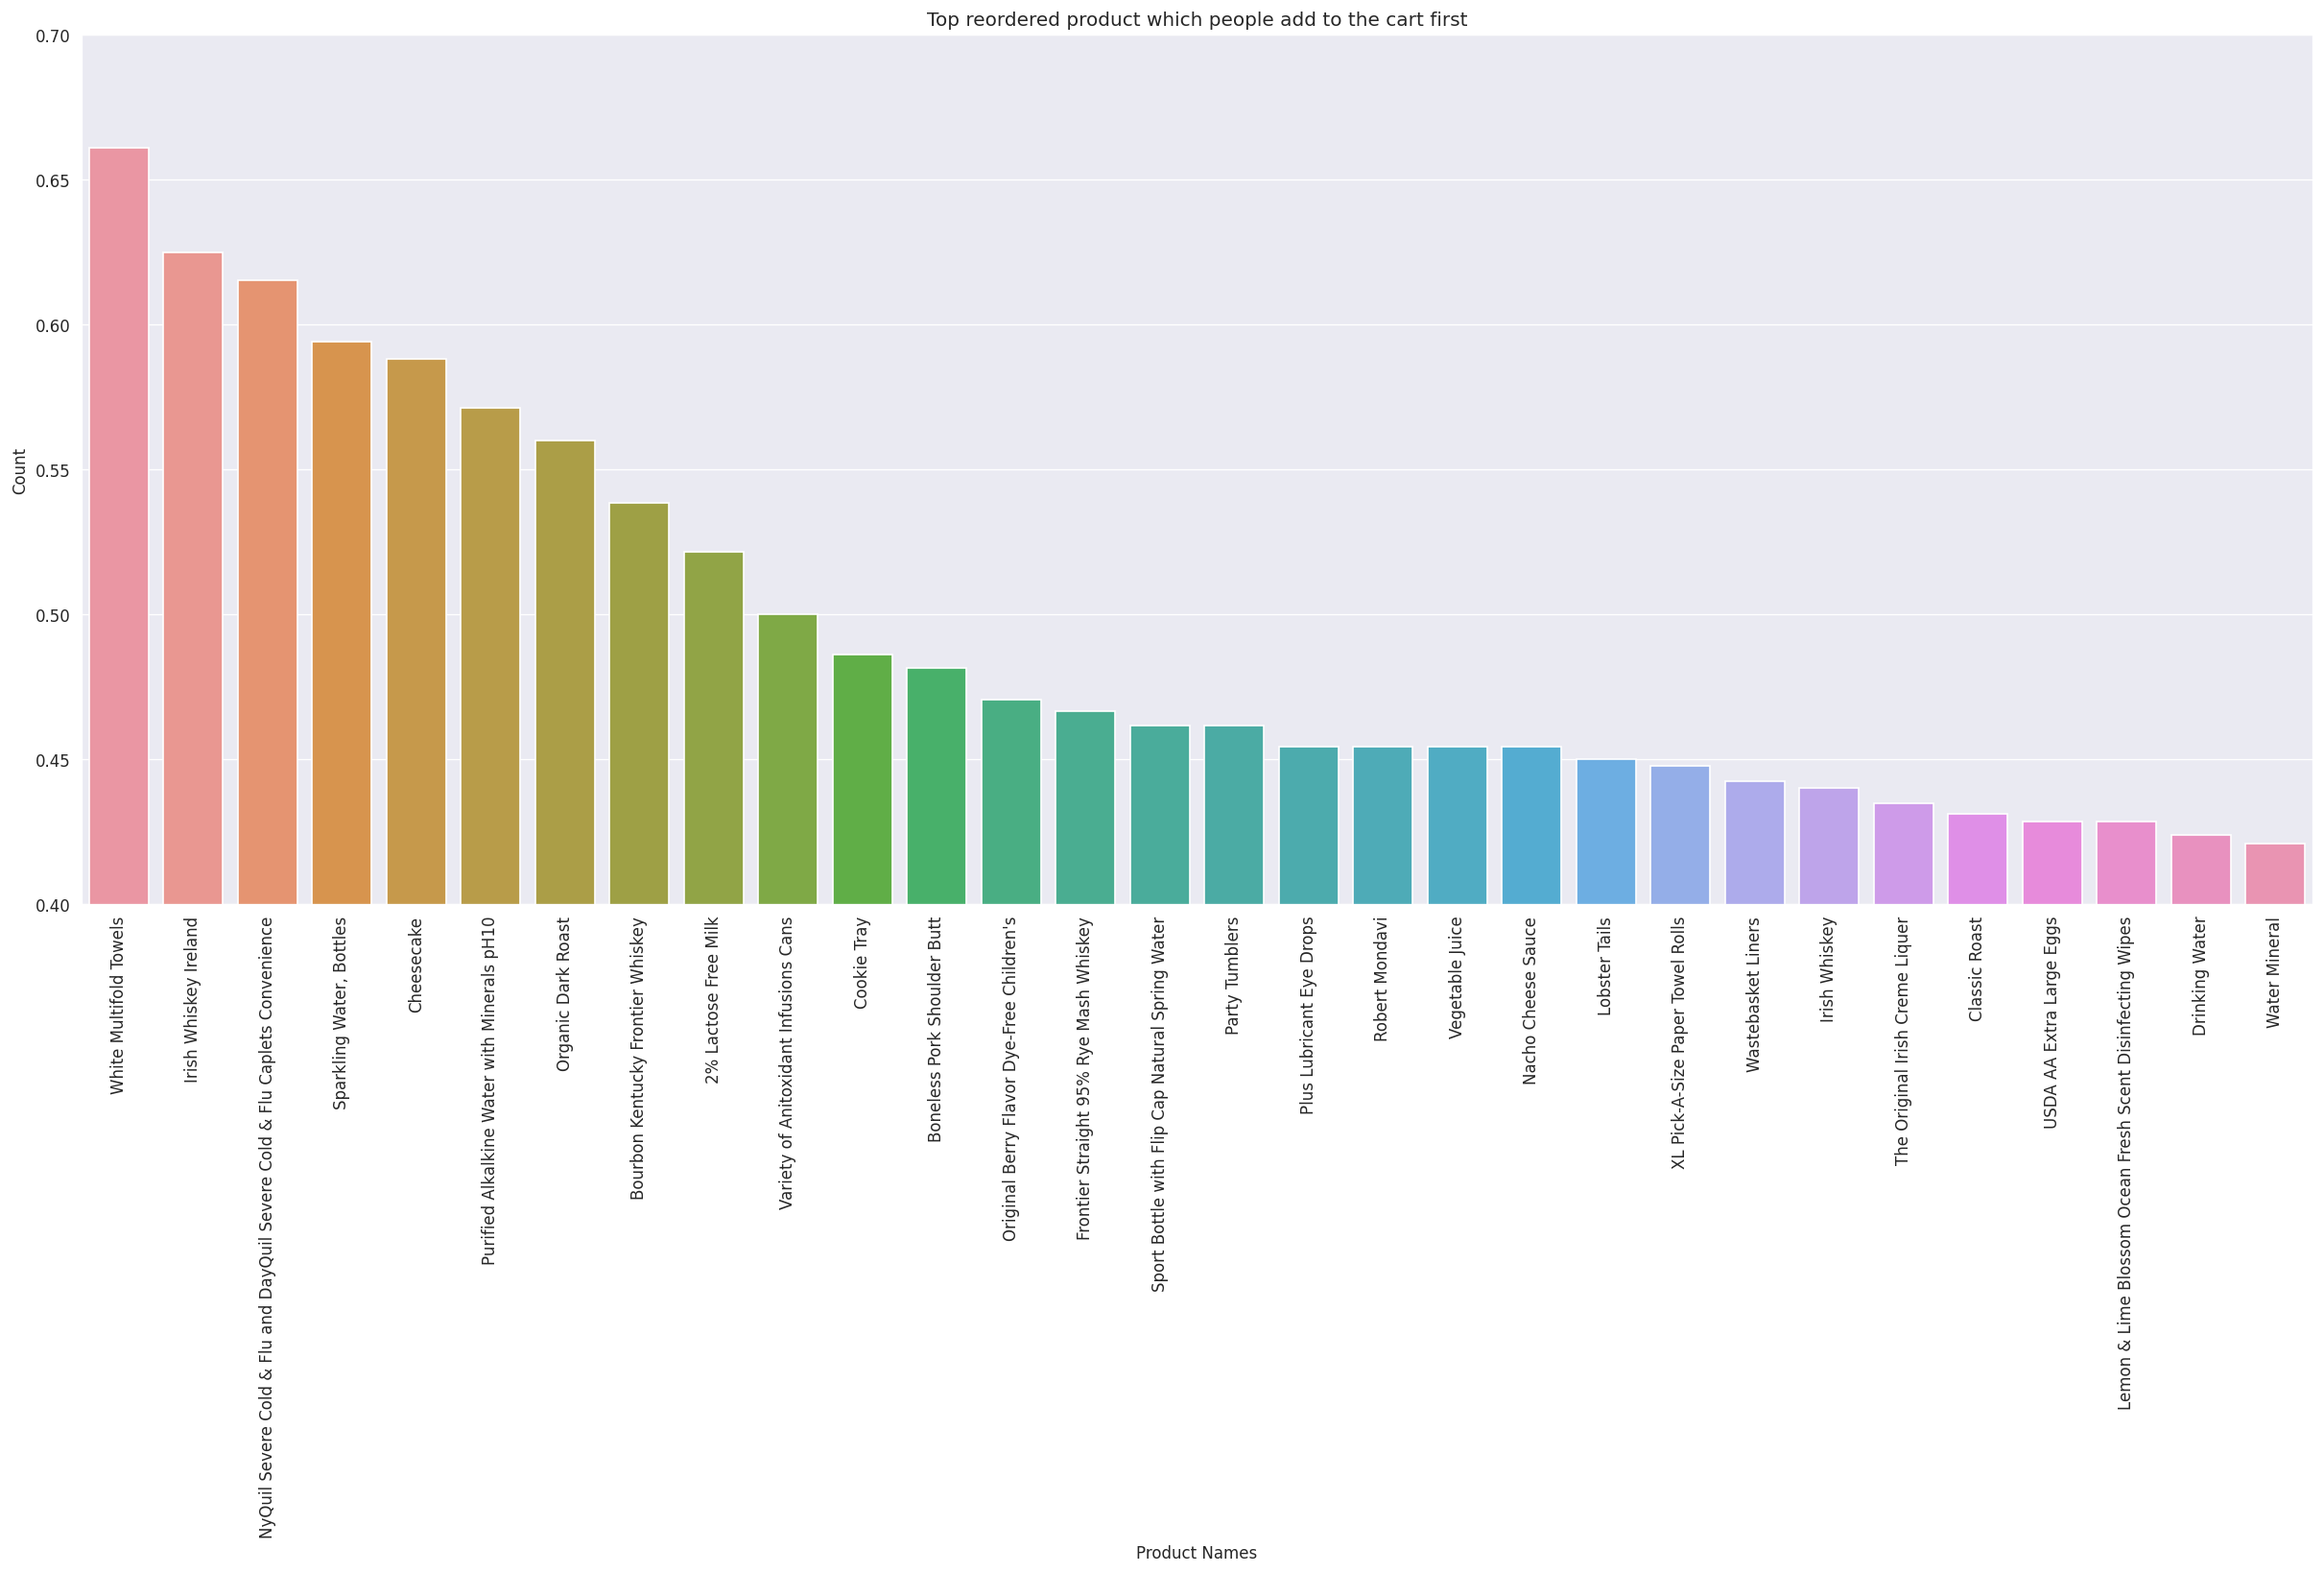

In [26]:
# Graphical representation Top Reordered Products which customer added to the cart first
productsCountFirst = order_products_train[order_products_train["add_to_cart_order"]==1]["product_id"].value_counts().to_frame()
productsCountFirst["reordered_count"] = productsCountFirst.product_id
productsCountFirst["product_id"] = productsCountFirst.index
productCountFirstMerged = pd.merge(productsCount,productsCountFirst,how="left",on="product_id").sort_values(by="count",ascending=False)
productCountFirstMerged["first_ordered_ratio"] = productCountFirstMerged["reordered_count"]/productCountFirstMerged["count"]
productCountFirstMerged.sort_values(by="first_ordered_ratio",ascending=False,inplace=True)
firstMerged = pd.merge(productCountFirstMerged,products,how="left",on="product_id")


fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.barplot(data=firstMerged[firstMerged["count"]>10].head(30),x="product_name",y="first_ordered_ratio",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top reordered product which people add to the cart first")
ax.set_ylim(0.4,.7)
plt.xticks(rotation=90)
fig.savefig('Top reordered product which people add to the cart first.png')
firstMerged.head(10)

In [27]:
# Creating complete product department and aisles dataset including order history
complete_product_department_aisles_df= order_products_prior.append(order_products_train)
complete_product_department_aisles_df.shape

(33819106, 4)

In [28]:
complete_product_department_aisles_df = complete_product_department_aisles_df.merge(products, on ='product_id', how='left')
complete_product_department_aisles_df = complete_product_department_aisles_df.merge(aisles, on ='aisle_id', how='left')
complete_product_department_aisles_df = complete_product_department_aisles_df.merge(departments, on ='department_id', how='left')
complete_product_department_aisles_df = complete_product_department_aisles_df.merge(orders, on='order_id', how='left')
complete_product_department_aisles_df.shape

(33819106, 15)

In [29]:
complete_product_department_aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


In [31]:
#Reduced 49% memory usage for complete_product_department_aisles_df dataset after performing reduce memory method
complete_product_department_aisles_df = reduce_memory(complete_product_department_aisles_df)

Memory usage of properties dataframe is : 4128.308837890625  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  2031.902006149292  MB
This is  49.21875 % of the initial size


In [34]:
complete_product_department_aisles_df.shape


(33819106, 15)

#### Department  distribution 

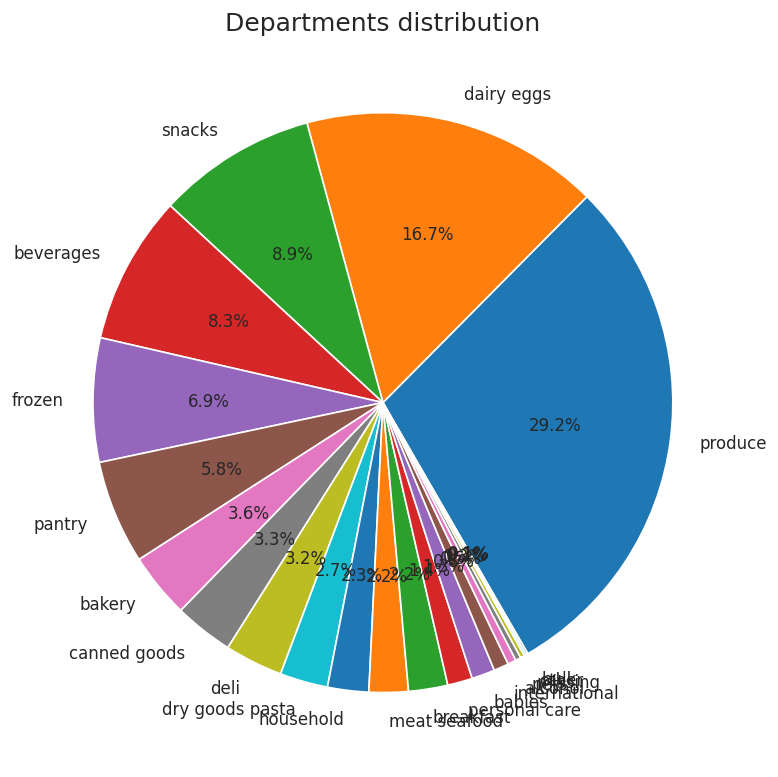

In [35]:
#Pie chart for unique department  distribution 
plt.figure(figsize=(8,8))
temp_series = complete_product_department_aisles_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=300)
plt.title("Departments distribution", fontsize=15)
fig.savefig('Departments distribution.png')
plt.show()

#### Department wise reorder ratio 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


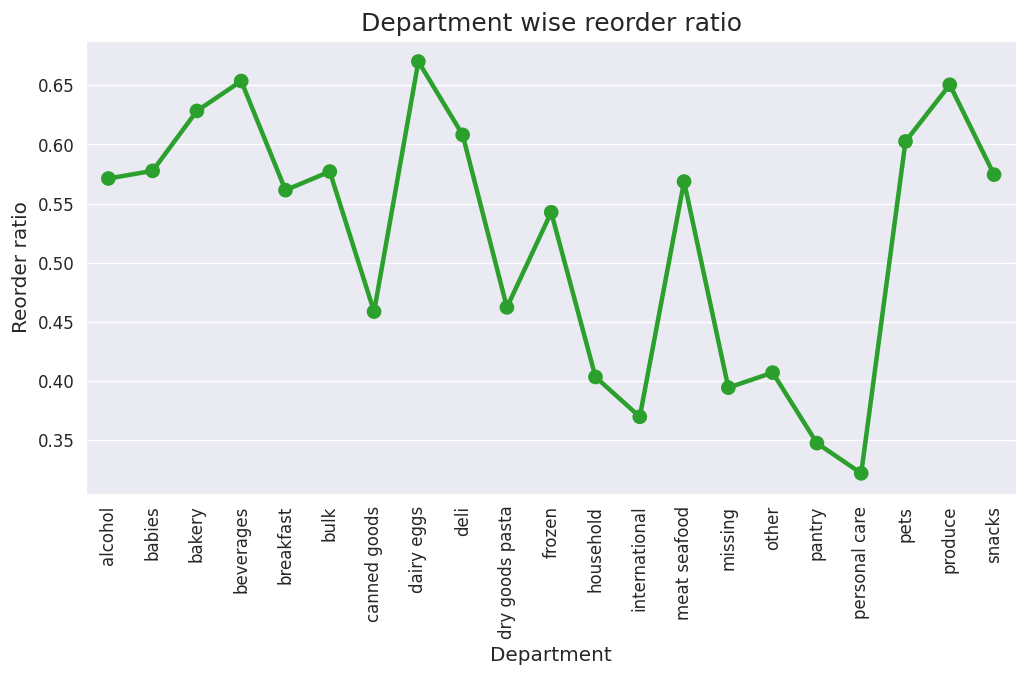

In [37]:
# Graphical representation  of department  wise reorder ratio
grouped_df = complete_product_department_aisles_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(10,5))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
fig.savefig('Department wise reorder ratio.png')
plt.show()

#### Most important Aisles in each Department (by number of Products)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

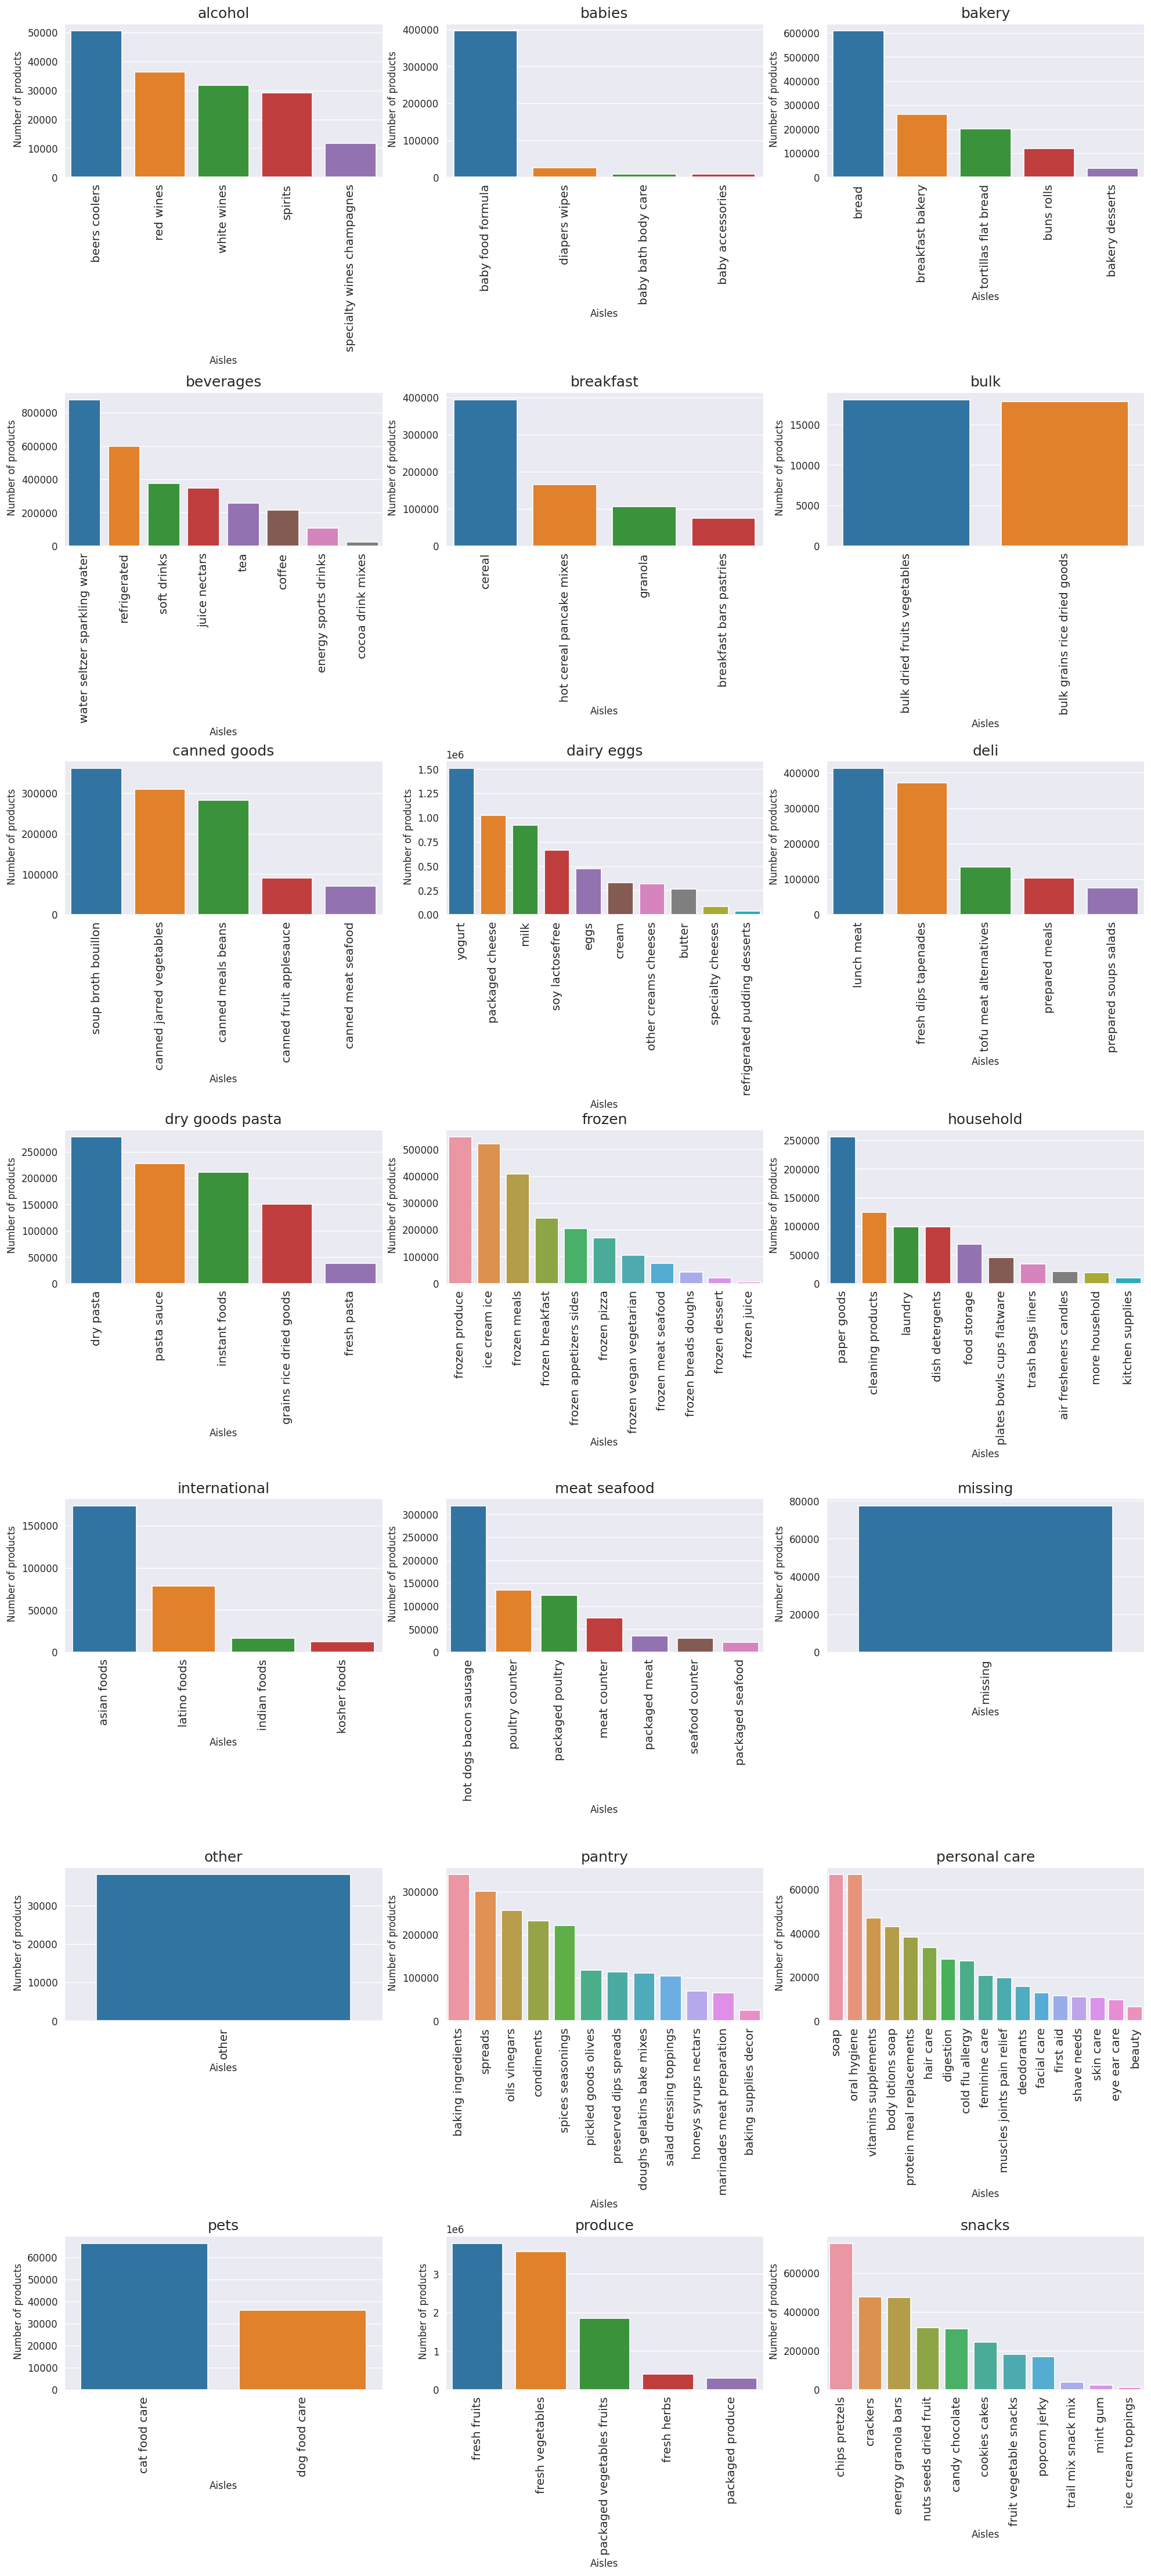

In [38]:
# Graphical representation of Most important Aisles in each Department (by number of Products)

grouped = complete_product_department_aisles_df.groupby(["department", "aisle"])["product_id"].aggregate(Total_products = 'count').reset_index()
grouped.sort_values(by='Total_products', ascending=False, inplace=True)
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, group.Total_products , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of products")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)
    fig.savefig('Most important Aisles in each Department (by number of Products).png')

#### Best Selling Aisles in each Department (number of Orders)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

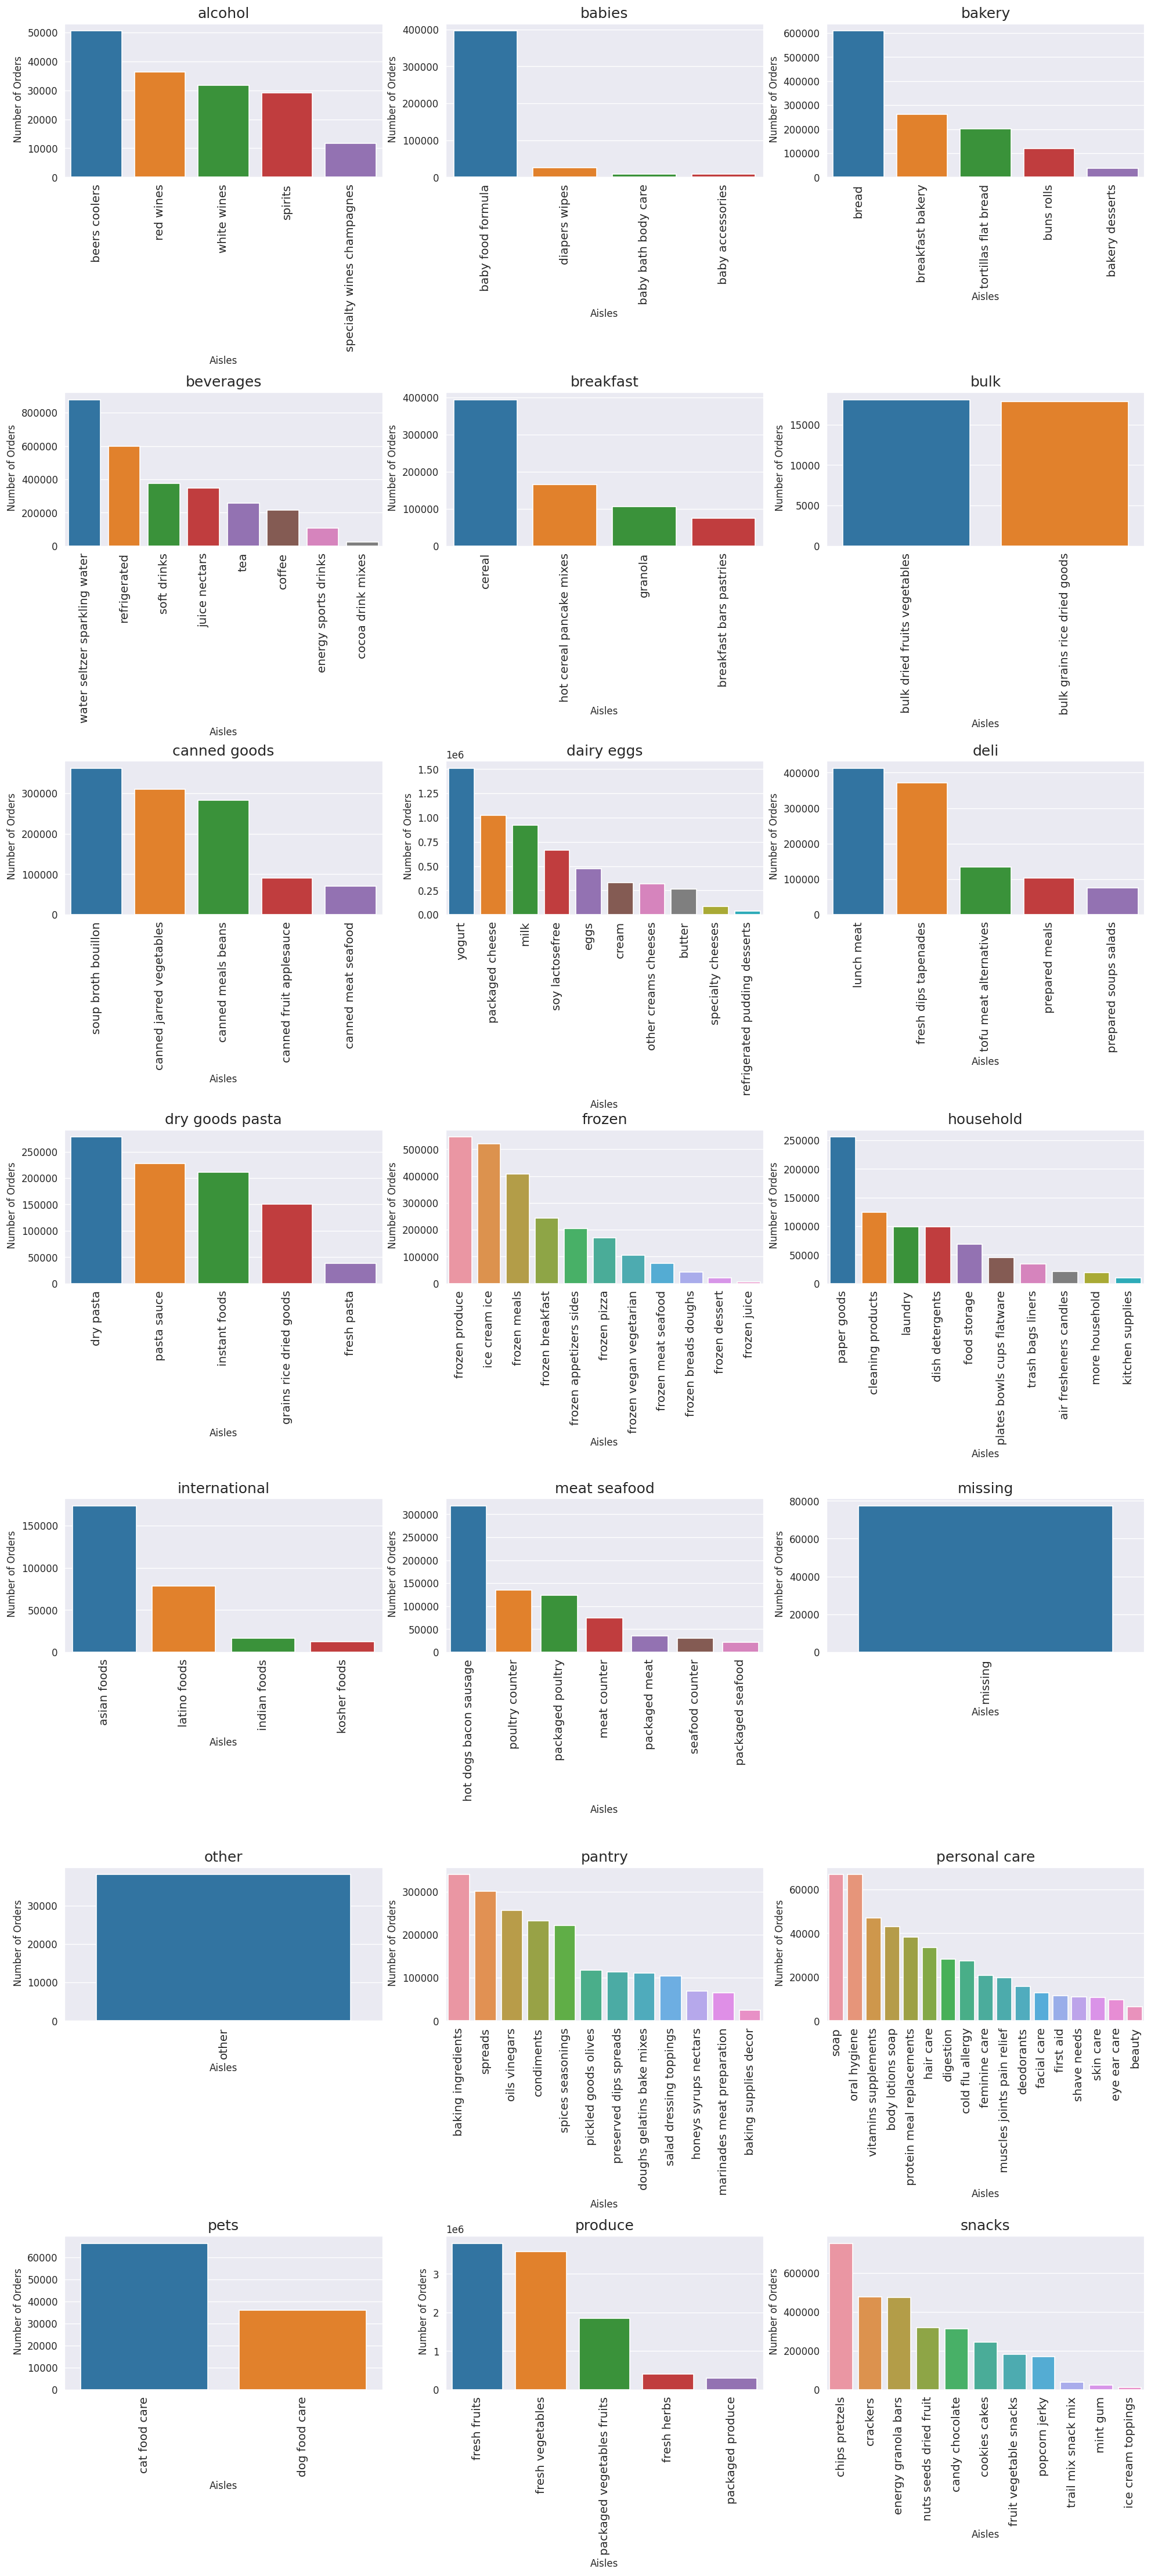

In [39]:
#Graphical representation of Best Selling Aisles in each Department (number of Orders)

grouped = complete_product_department_aisles_df.groupby(["department", "aisle"])["order_id"].aggregate(Total_orders = 'count').reset_index()
grouped.sort_values(by='Total_orders', ascending=False, inplace=True)
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, group.Total_orders , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of Orders")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)
    fig.savefig('Best Selling Aisles in each Department (number of Orders).png')

#### Total orders vs reordereds items from most popular Aisles

In [40]:
aisle_reordered_dataset_df = complete_product_department_aisles_df.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
aisle_reordered_dataset_df = aisle_reordered_dataset_df.sort_values('total', ascending=False).reset_index()

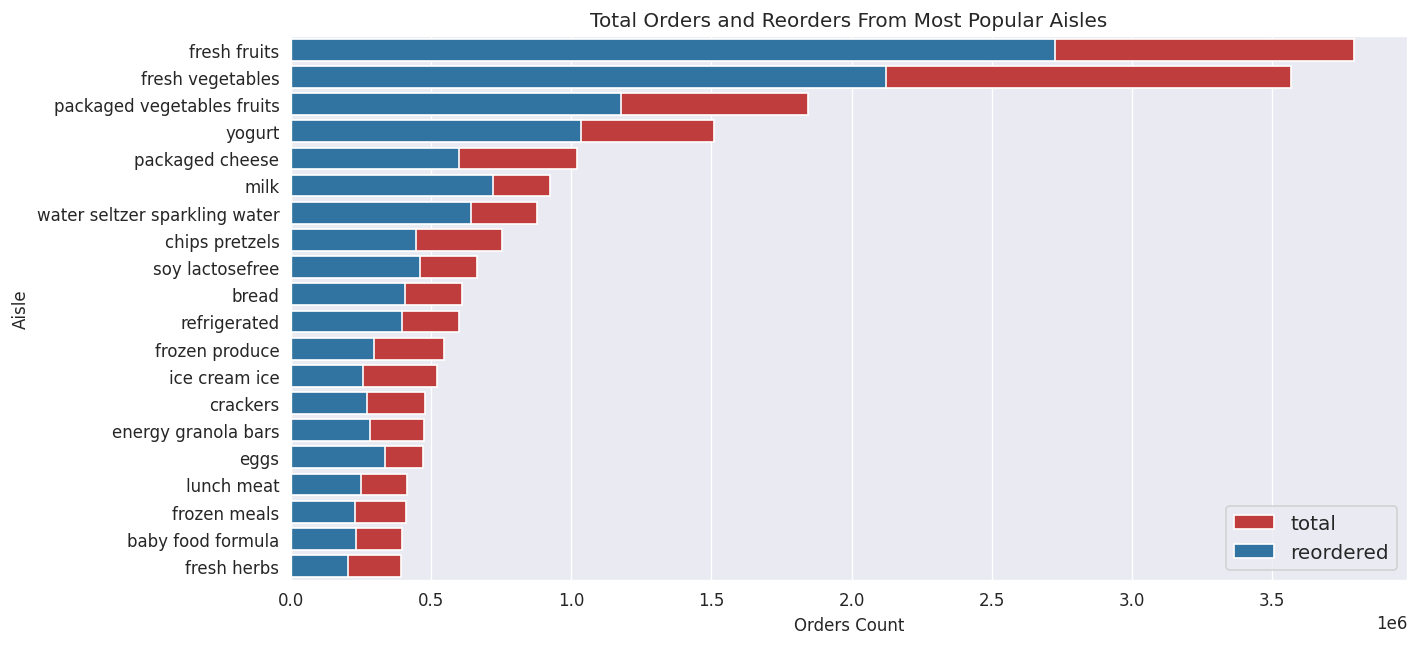

In [41]:
# Graphical representation of Total orders vs reordereds items from most popular Aisles
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(y = aisle_reordered_dataset_df.aisle[0:20], x = aisle_reordered_dataset_df.total[0:20], color=color[3], label = "total")
ax = sns.barplot(y = aisle_reordered_dataset_df.aisle[0:20], x = aisle_reordered_dataset_df.reorders[0:20], color=color[0], label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
fig.savefig('Total Orders vs reorders From MOst popular Aisles.png')
plt.show()

#### Total orders vs reordereds items from most popular departments 

In [42]:
department_reordered_dataset_df = complete_product_department_aisles_df.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
department_reordered_dataset_df = department_reordered_dataset_df.sort_values('total', ascending=False).reset_index()

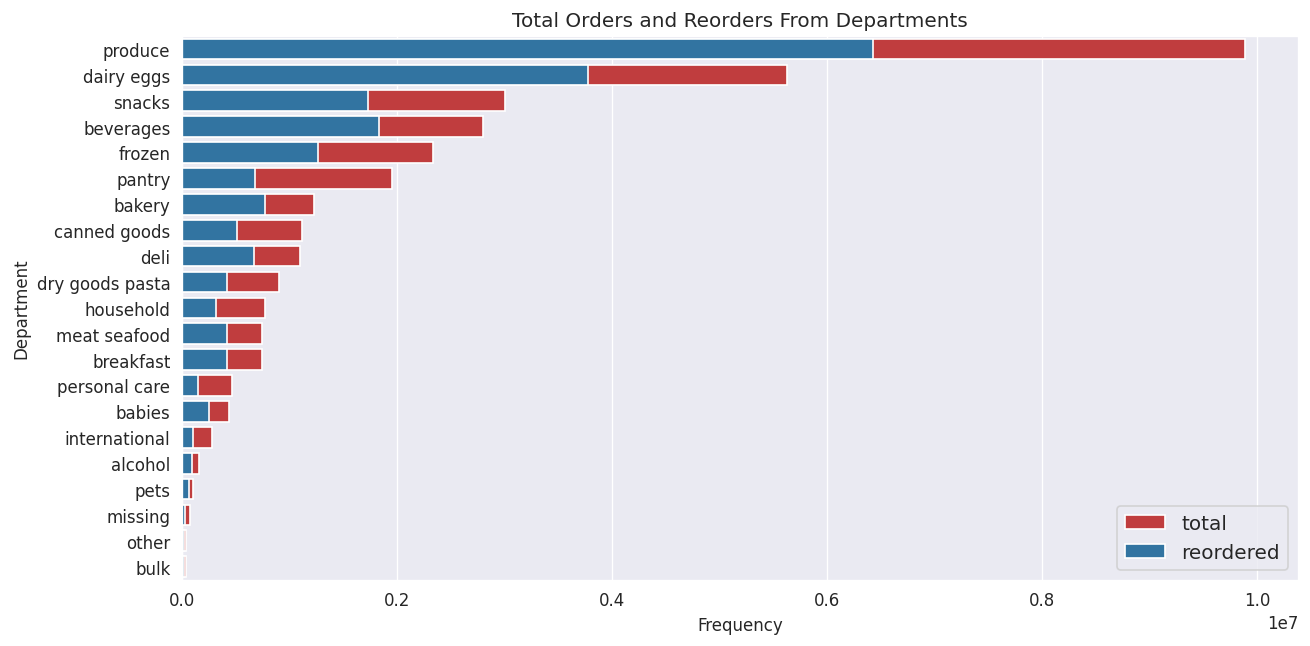

In [43]:
##### Graphical  representation of Total orders vs reordereds items from most popular departments 
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(y = department_reordered_dataset_df.department, x = department_reordered_dataset_df["total"], color=color[3], label = "total")
ax = sns.barplot(y = department_reordered_dataset_df.department, x = department_reordered_dataset_df["reorders"], color=color[0], label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
fig.savefig('Total Orders and Reorders From Departments.png')
plt.show()

#### Total orders vs reordereds items from most popular Products 

In [44]:
product_reordered_dataset_df = complete_product_department_aisles_df.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
product_reordered_dataset_df = product_reordered_dataset_df.sort_values('total', ascending=False).reset_index()

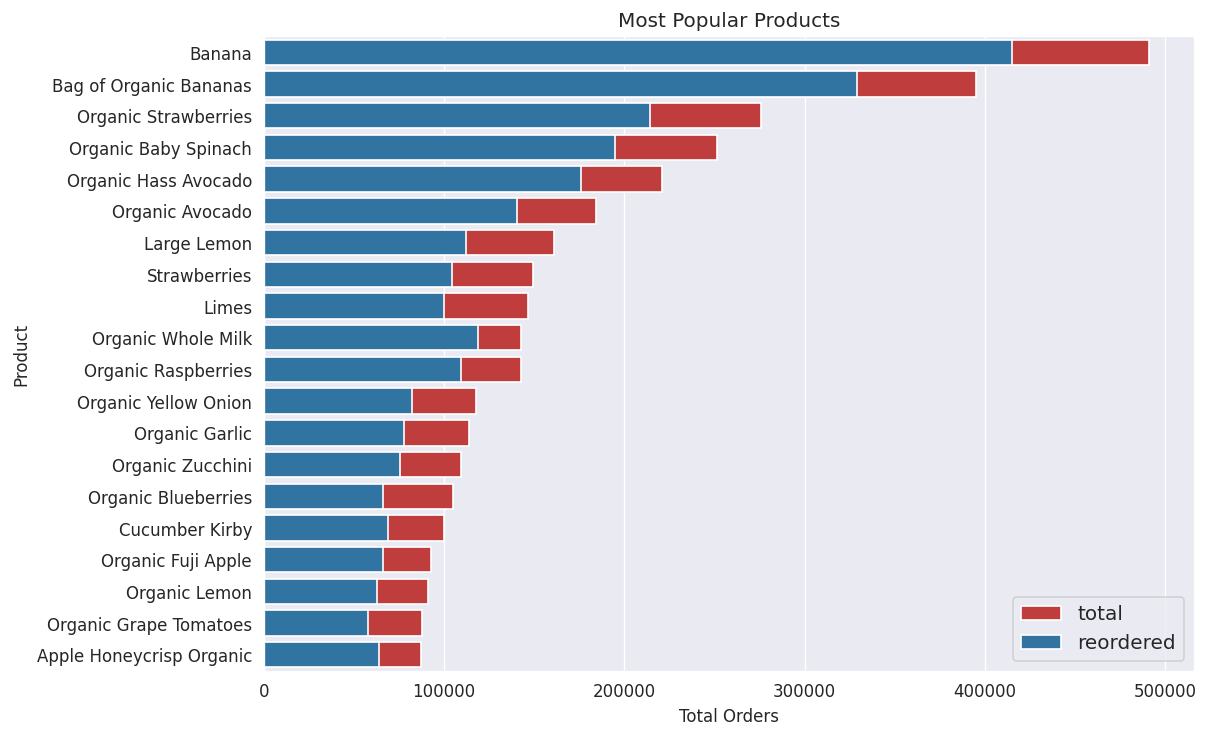

In [45]:
#### Graphical representation of Total orders vs reordereds items from most popular Products
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = product_reordered_dataset_df.product_name[0:20], x = product_reordered_dataset_df.total[0:20], color=color[3], label = "total")
ax = sns.barplot(y = product_reordered_dataset_df.product_name[0:20], x = product_reordered_dataset_df.reorders[0:20], color=color[0], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
fig.savefig('Total Orders and Reorders for Most popular Product.png')
plt.show()

#### Product wise high reordered ratio 

In [47]:
# Top products where reordered ratio is high
product_reordered_dataset_df["reorder_ratio"] = product_reordered_dataset_df.reorders/product_reordered_dataset_df.total
product_reordered_dataset_df.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23853,Raw Veggie Wrappers,69,65.0,0.942029
21388,Serenity Ultimate Extrema Overnight Pads,90,84.0,0.933333
40147,Orange Energy Shots,13,12.0,0.923077
20296,Chocolate Love Bar,102,94.0,0.921569
30746,Soy Powder Infant Formula,35,32.0,0.914286
28078,Simply Sleep Nighttime Sleep Aid,45,41.0,0.911111
35213,"Energy Shot, Grape Flavor",22,20.0,0.909091
32316,Russian River Valley Reserve Pinot Noir,30,27.0,0.900000
23918,Bars Peanut Butter,69,62.0,0.898551
24218,Soy Crisps Lightly Salted,67,60.0,0.895522


In [48]:
# Top products vs total_users details where reordered ratio is high
product_unique_users = product_unique_users.merge(product_reordered_dataset_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)

,product_name,total_users,total,reorders,reorder_ratio
37379,Raw Veggie Wrappers,4,69,65.0,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,90,84.0,0.933333
28415,Orange Energy Shots,1,13,12.0,0.923077
8537,Chocolate Love Bar,8,102,94.0,0.921569
41723,Soy Powder Infant Formula,3,35,32.0,0.914286
40458,Simply Sleep Nighttime Sleep Aid,4,45,41.0,0.911111
13844,"Energy Shot, Grape Flavor",2,22,20.0,0.909091
38793,Russian River Valley Reserve Pinot Noir,3,30,27.0,0.900000
3832,Bars Peanut Butter,7,69,62.0,0.898551
41712,Soy Crisps Lightly Salted,7,67,60.0,0.895522


#### Add to cart order vs reordered ratio

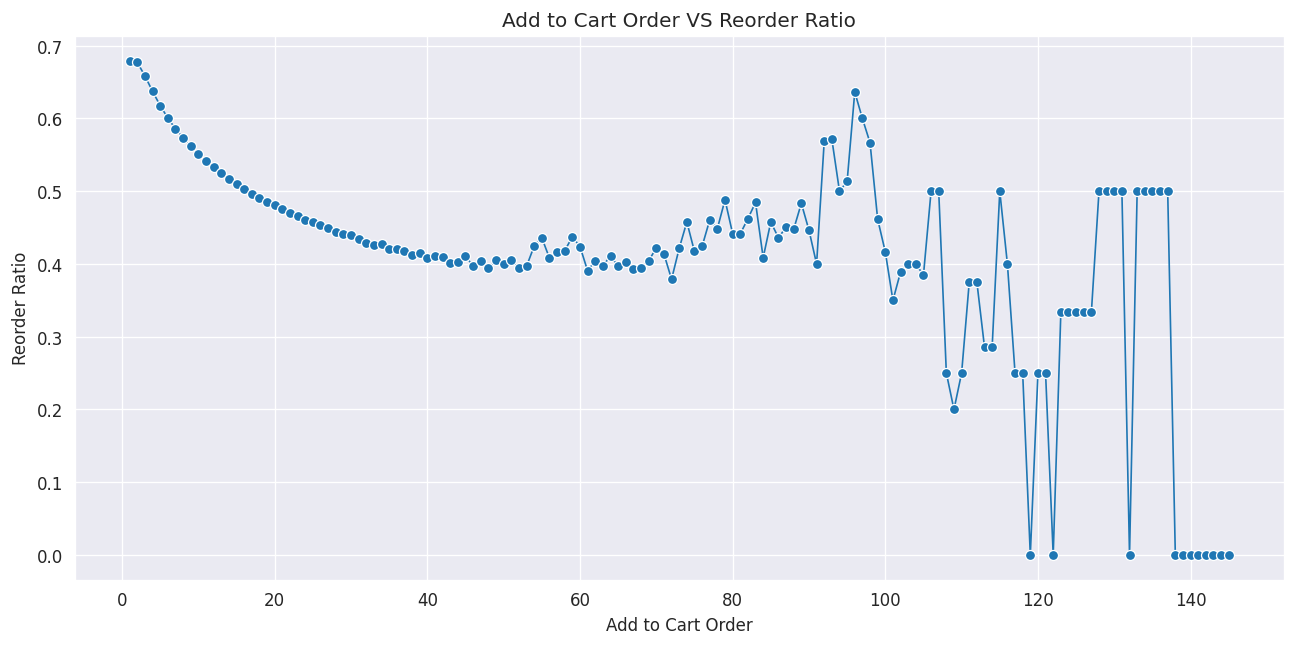

In [49]:
#Graphical representation of add to cart order vs reordered ratio
add_vs_reordered_df = complete_product_department_aisles_df.groupby('add_to_cart_order')['reordered'].mean().reset_index()
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=add_vs_reordered_df.add_to_cart_order, y=add_vs_reordered_df.reordered, lw = 1, marker='o')
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
fig.savefig('Add to Cart Order VS Reorder Ratio.png')
plt.show()

#### Most popular products on different days of week

In [50]:
most_popular_order_vs_days = complete_product_department_aisles_df.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
most_popular_order_vs_days = most_popular_order_vs_days.sort_values(['order_dow', 'counts'], ascending=[True, False])
most_popular_order_vs_days = most_popular_order_vs_days.groupby('order_dow').head(5).reset_index(drop = True)

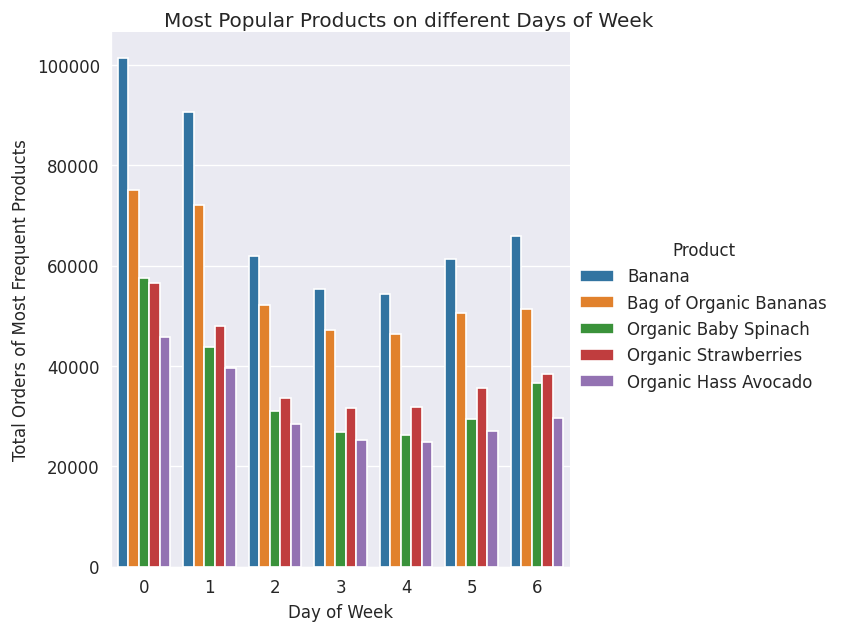

In [51]:
#Graphical representation of Most popular products on different days of week
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=most_popular_order_vs_days, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")
